In [21]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.style as style 
style.available
import plotly.express as px

style.use('seaborn-poster')
style.use('seaborn-notebook')

In [12]:
# Read in Covid-19 confirmed cases and deaths datasets from CSSE at John Hopkins University on Github. 

csse_cases_all = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#csse_cases_all.head()

csse_deaths_all = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#csse_deaths_all.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4


In [18]:
def single_country(country, df):
    '''
    Function to provide Dataframe with cumulated cases of Covid-19 
    out of CSSE data for a single country. 
    
    Args:
        country (string): Name of country whose timeline should be prepared. 
        df (Dataframe): Name of dataframe (confirmed cases or deaths) that should be included. 
        
    Returns: 
        country_timeline (Dataframe): Dataframe with two columns, datetime and confirmed cases. 
    '''
    
    # Select rows for the given country and apply pd.melt to unpivot DataFrame 
    # from wide to long format. Drop for now unnessary rows ('Province/State', 'Lat', 'Long').
    country_timeline = df[df['Country/Region'] == country]
    country_timeline = pd.melt(country_timeline)
    country_timeline = country_timeline.drop(country_timeline.index[[0, 1, 2, 3]])
    
    # Rename columns and apply pandas datetime function. 
    country_timeline.columns = ['date', 'confirmed_cases']
    country_timeline['date'] = pd.to_datetime(country_timeline['date'])
    
    return country_timeline

In [19]:
# Apply single_country function: 
single_country('Chile', csse_deaths_all)

,date,confirmed_cases
4,2020-01-22,0
5,2020-01-23,0
6,2020-01-24,0
7,2020-01-25,0
8,2020-01-26,0
...,...,...
125,2020-05-22,630
126,2020-05-23,673
127,2020-05-24,718
128,2020-05-25,761


In [16]:
def country_daily(country, df, days = 7):
    '''
    Function to provide the daily increase of confirmed cases of
    Covid-19 in a chosen country. An extra column includes the rolling
    average for a given amount of days. 
    
    Args: 
        country (string): Name of country whose timeline should be prepared.
        number of days (int), optional: Number of days for rolling average.
        df (Dataframe): Name of dataframe (confirmed cases or deaths) that should be included. 
        
    Returns:
        Dataframe with three columns: date, daily increase and rolling average.
    '''
    
    # Apply single_country_confirmed function and retrieve difference between
    # two dates. Add one column with rolling average and finally fill NaNs will 0. 
    country_df = single_country(country, df)
    country_df['confirmed_cases'] = country_df.confirmed_cases.diff()
    country_df['rolling'] = country_df.rolling(days).mean()
    country_df.columns = ['date', 'daily increase', 'rolling']
    country_df.fillna(0)
    
    return country_df.fillna(0)

In [20]:
# Apply country_daily function:
chile = country_daily('Chile', csse_deaths_all)
print(chile.head())

        date  daily increase  rolling
4 2020-01-22               0      0.0
5 2020-01-23               0      0.0
6 2020-01-24               0      0.0
7 2020-01-25               0      0.0
8 2020-01-26               0      0.0


,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-05-23,482,1471,1897,182,294,2116,51399,518,823,1077,1354,1774,274,727,8,997,65393
82,2020-05-24,498,1564,1947,182,323,2230,54544,554,892,1102,1414,1808,290,736,8,1010,69102
83,2020-05-25,513,1630,2015,185,338,2305,58930,588,953,1139,1458,1857,297,763,10,1016,73997
84,2020-05-26,522,1737,2063,188,384,2455,62285,654,1013,1147,1502,1883,304,781,12,1031,77961


In [ ]:
px.set_mapbox_access_token(open(".mapbox_token").read())
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [33]:
# First look at the data: 

def first_look (df):
    """
    Provides useful information about a dataframe. 
    
    Input: 
        Pandas dataframe
        
    Output: 
        Dataframe name
        Dataframe shape
        Dataframe NaNs
        Dataframe describe
    """
    # Enable function to print dataframes name. 
    def get_df_name(df): 
        name =[x for x in globals() if globals()[x] is df][0]
        return name
    
    print('Information for DataFrame ' + get_df_name(df))
    print('The shape of the Dataframe is: {}'.format(df.shape))
    print('---\n Information about NaNs:')
    print((np.sum(df.isna() == True))/df.shape[0])
    print('---\n Pandas describe')
    print(df.describe())
    print('---')

#first_look(cases_region)

In [29]:
# Import dataset about Covid-19 cases in Chile from Chilean government's GitHub repo
cases_region = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv',
    parse_dates = True
)

#cases_region.head()


# Casos totales y fallecidos totales: 
# https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto5/TotalesNacionales_T.csv
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/05-24-2020.csv

# Transform wide dataframe to long dataframe 
cases_region_long = pd.melt(
    cases_region, id_vars = 'Region', 
    value_vars = cases_region.columns.drop('Region'),
    var_name='Regions', 
    value_name='Cases'
)

# Apply pandas to datetime and rename column for better understanding
cases_region_long['Region'] = pd.to_datetime(cases_region_long['Region'], format = '%Y-%m-%d')
cases_region_long = cases_region_long.rename(columns = {'Region': 'Date'}).sort_values('Cases', ascending = False)
cases_region_long

,Date,Regions,Cases
1461,2020-05-27,Total,82289
1460,2020-05-26,Total,77961
1459,2020-05-25,Total,73997
1458,2020-05-24,Total,69102
601,2020-05-27,Metropolitana,66011
...,...,...,...
1120,2020-03-05,Los Lagos,0
1121,2020-03-06,Los Lagos,0
268,2020-03-13,Atacama,0
267,2020-03-12,Atacama,0


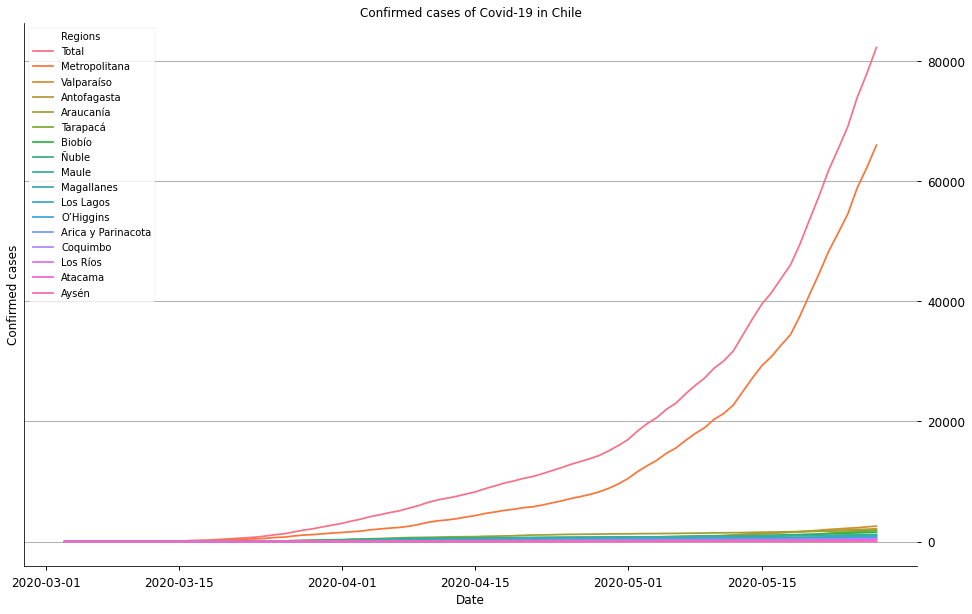

In [30]:
# Make a plot of confirmed cases of Covid-19 in all regions of Chile

f, ax = plt.subplots(figsize = (16, 10))
g = sns.lineplot(cases_region_long.Date, 
                 cases_region_long.Cases, 
                hue = cases_region_long.Regions)


plt.xlabel('Date', fontsize = 12)
plt.ylabel('Confirmed cases', fontsize = 12)
plt.title('Confirmed cases of Covid-19 in Chile', fontsize = 12)
plt.tick_params(labelsize=12)
ax.yaxis.tick_right()


plt.grid(False)
ax.yaxis.grid()
sns.despine()

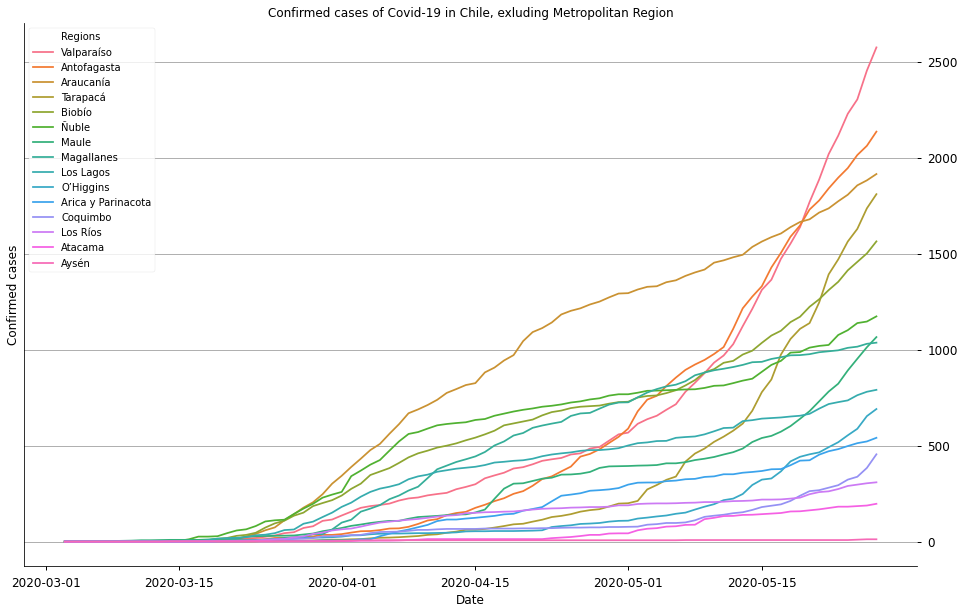

In [31]:
cases_region_long_province = cases_region_long[cases_region_long.Regions.isin(['Metropolitana', 'Total']) == False]


f, ax = plt.subplots(figsize = (16, 10))
g = sns.lineplot(cases_region_long_province.Date, 
                 cases_region_long_province.Cases, 
                 hue = cases_region_long_province.Regions)

plt.xlabel('Date', fontsize = 12)
plt.ylabel('Confirmed cases', fontsize = 12)
plt.title('Confirmed cases of Covid-19 in Chile, exluding Metropolitan Region', fontsize = 12)
plt.tick_params(labelsize=12)
ax.yaxis.tick_right()


plt.grid(False)
ax.yaxis.grid()
sns.despine()

In [32]:
cases_comuna = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_T.csv')

unnumerated_columns = []
for item in cases_comuna.columns:
    item.split('.')
    unnumerated_columns.append(item.split('.')[0])
    
    
cases_comuna.columns = unnumerated_columns
cases_comuna_timeline = cases_comuna.drop(cases_comuna.index[[0,2,3]]).iloc[:-1]

cases_comuna_metro = cases_comuna_timeline[['Region', 'Metropolitana']]
cases_comuna_metro.columns = cases_comuna_metro.iloc[0]

cases_comuna_metro = cases_comuna_metro.drop(cases_comuna_metro.index[0])
cases_comuna_metro['Comuna'] = pd.to_datetime(cases_comuna_metro['Comuna'], format = '%Y-%m-%d')

cases_comuna_metro_long = pd.melt(
    cases_comuna_metro, id_vars = 'Comuna', 
    value_vars = cases_comuna_metro.columns.drop('Comuna'),
    var_name='Comunas', 
    value_name='Cases'
)

cases_comuna_metro_long = cases_comuna_metro_long.rename(columns = {'Comuna': 'Date'})
cases_comuna_metro_long['Cases'] = cases_comuna_metro_long.Cases.astype(float)

top_comunas = cases_comuna_metro_long.groupby('Comunas'
                                             ).Cases.max().reset_index().sort_values('Cases', 
                                                                                     ascending = False).head(20)

top_comunas = top_comunas['Comunas'].tolist()
top_comunas

cases_comuna_metro_top = cases_comuna_metro_long[cases_comuna_metro_long.Comunas.isin(top_comunas)].reset_index().sort_values('Cases', ascending = False)
cases_comuna_metro_top

,index,Date,Comunas,Cases
379,930,2020-05-22,Santiago,3935.0
246,721,2020-05-22,Puente Alto,3658.0
378,929,2020-05-18,Santiago,2961.0
245,720,2020-05-18,Puente Alto,2780.0
377,928,2020-05-15,Santiago,2627.0
...,...,...,...,...
96,305,2020-04-01,La Granja,8.0
343,894,2020-04-01,San Ramon,6.0
95,304,2020-03-30,La Granja,5.0
114,323,2020-03-30,La Pintana,0.0


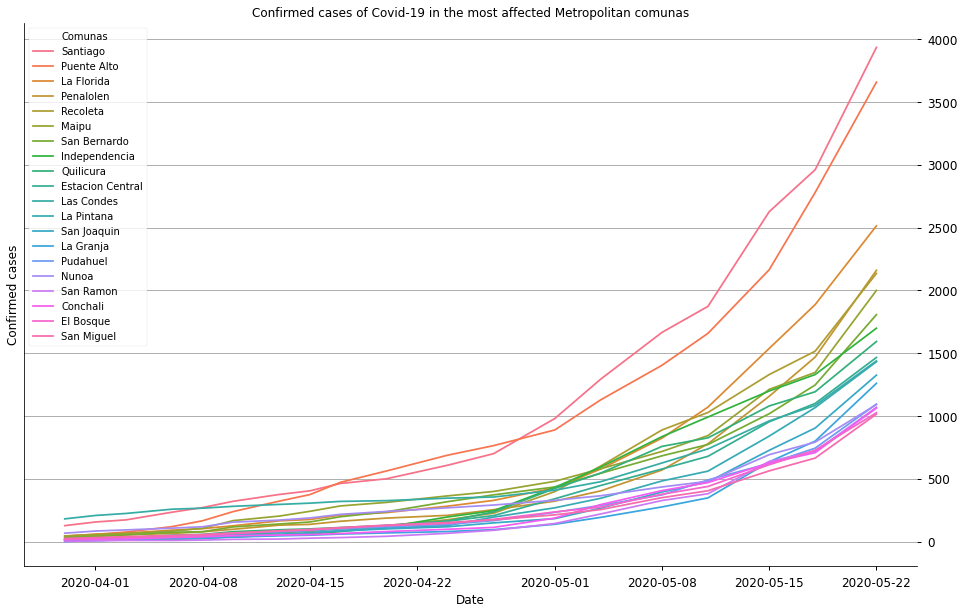

In [86]:
f, ax = plt.subplots(figsize = (16, 10))
g = sns.lineplot(cases_comuna_metro_top.Date, 
                 cases_comuna_metro_top.Cases, 
                 hue = cases_comuna_metro_top.Comunas)

plt.xlabel('Date', fontsize = 12)
plt.ylabel('Confirmed cases', fontsize = 12)
plt.title('Confirmed cases of Covid-19 in the most affected Metropolitan comunas', fontsize = 12)
plt.tick_params(labelsize=12)
ax.yaxis.tick_right()


plt.grid(False)
ax.yaxis.grid()
sns.despine()

In [125]:

cases_comuna_tasa = cases_comuna.loc[[1, 23]]
cases_comuna_tasa = cases_comuna_tasa[['Region', 'Metropolitana']]
cases_comuna_tasa.columns = cases_comuna_tasa.iloc[0]
cases_comuna_tasa = cases_comuna_tasa.drop(cases_comuna_tasa.index[0]).drop('Comuna', axis = 1)

cases_comuna_tasa = pd.melt(cases_comuna_tasa)
cases_comuna_tasa.columns = ['Comuna', 'Daily Increase']
cases_comuna_tasa['Daily Increase'] = cases_comuna_tasa['Daily Increase'].astype(float)
cases_comuna_tasa = cases_comuna_tasa.sort_values('Daily Increase', ascending = False)
cases_comuna_tasa.head()


,Comuna,Daily Increase
43,San Joaquin,1280.4
47,San Ramon,1235.7
12,Independencia,1195.9
40,Recoleta,1123.2
16,La Granja,1028.1


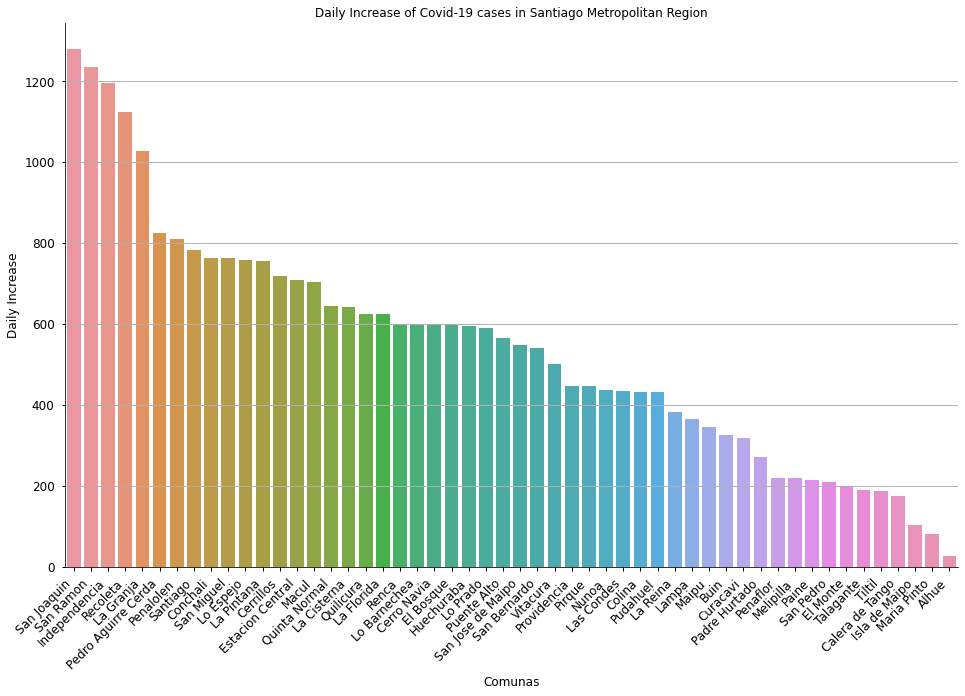

In [130]:
f, ax = plt.subplots(figsize = (16, 10))
g = sns.barplot(cases_comuna_tasa.Comuna, 
                 cases_comuna_tasa['Daily Increase'])

plt.xlabel('Comunas', fontsize = 12)
plt.ylabel('Daily Increase', fontsize = 12)
plt.title('Daily Increase of Covid-19 cases in Santiago Metropolitan Region', fontsize = 12)
plt.tick_params(labelsize=12)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.grid(False)
ax.yaxis.grid()
sns.despine()